In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
file_path='/content/drive/MyDrive/MACHINE LEARNING/DATASETS/Iris flower dataset.csv'
data = pd.read_csv(file_path)


In [ ]:
X = data.iloc[:, :-1].values
y_true = data.iloc[:, -1].values
feature_names = data.columns[:-1]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sil_scores = []
K = range(2, 11)


In [ ]:
for k in K:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X_scaled)
      labels = kmeans.labels_
      sil = silhouette_score(X_scaled, labels)
      sil_scores.append(sil)
best_k = K[np.argmax(sil_scores)]
print(f"Best k based on silhouette score: {best_k}")

Best k based on silhouette score: 2


In [ ]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(X_scaled)
labels = final_kmeans.labels_

In [ ]:
cluster_centers = final_kmeans.cluster_centers_
cluster_sizes = np.bincount(labels)
print("\nCluster sizes:", cluster_sizes)
print("\nCluster centers:\n", cluster_centers)


Cluster sizes: [ 50 100]

Cluster centers:
 [[-1.1547262  -1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 0.5773631   0.50728948 -0.4211534   0.65243918  0.62756431]]


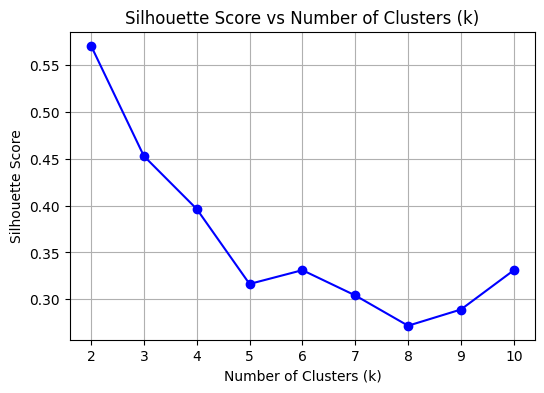

 Best k based on silhouette score: 2


In [ ]:
plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, marker='o', color='blue')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = K[np.argmax(sil_scores)]
print(f" Best k based on silhouette score: {best_k}")


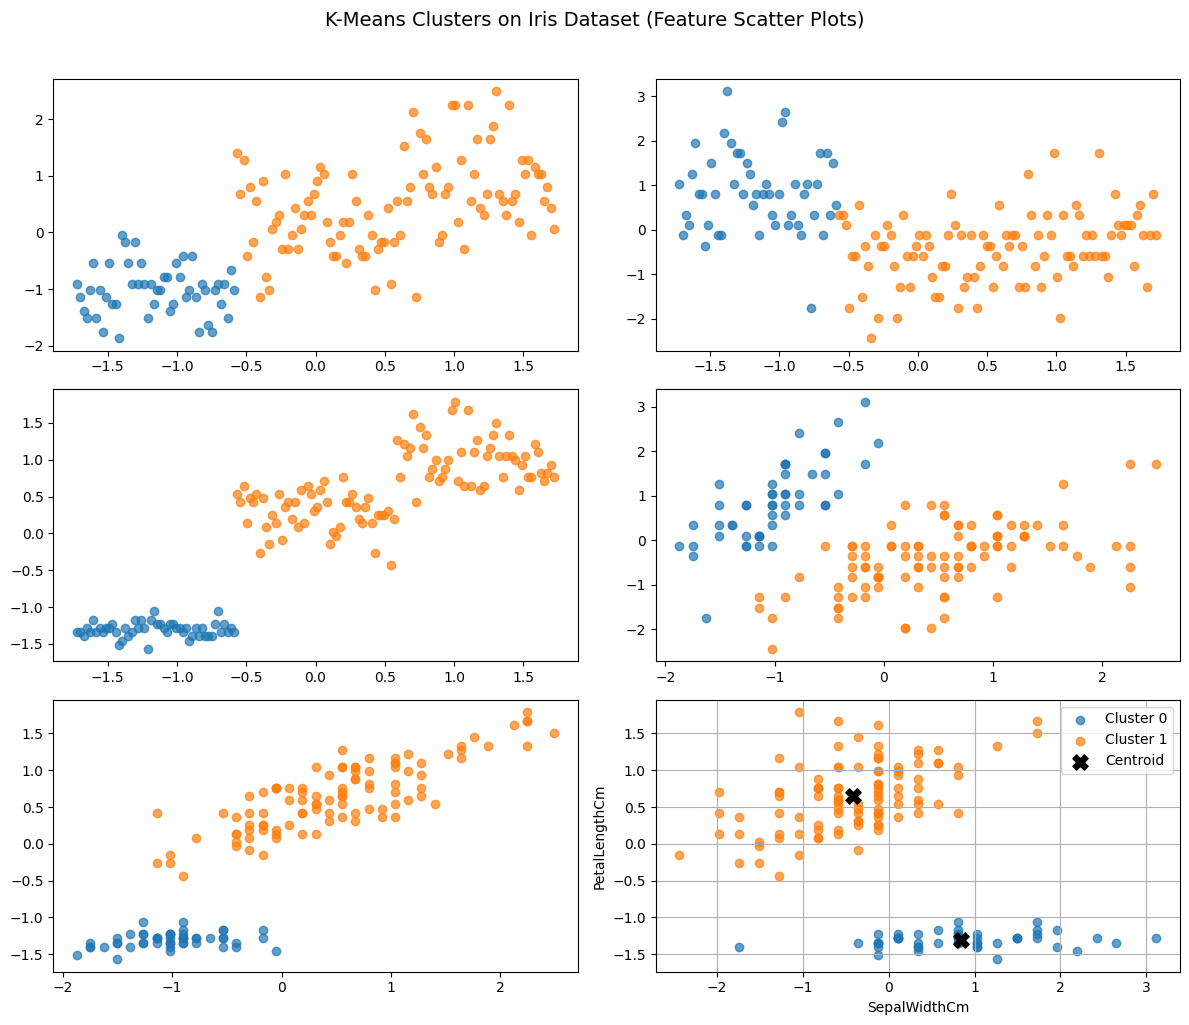

In [ ]:
plt.figure(figsize=(12,10))
plt.suptitle("K-Means Clusters on Iris Dataset (Feature Scatter Plots)", fontsize=14, y=1.02)
combinations = [
    (0, 1), (0, 2), (0, 3),
        (1, 2), (1, 3), (2, 3)
]
for i, (x_idx, y_idx) in enumerate(combinations, 1):
      plt.subplot(3, 2, i)
      for cluster_id in range(best_k):
        plt.scatter(
            X_scaled[labels == cluster_id, x_idx],
            X_scaled[labels == cluster_id, y_idx],
            label=f'Cluster {cluster_id}',
            alpha=0.7
)
plt.scatter(cluster_centers[:, x_idx], cluster_centers[:, y_idx], c='black', s=120, marker='X', label='Centroid')
plt.xlabel(feature_names[x_idx])
plt.ylabel(feature_names[y_idx])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
comparison = pd.crosstab(y_true, labels, rownames=['True Species'], colnames=['Cluster'])
print("\nCluster mapping to true species:\n")
print(comparison)


Cluster mapping to true species:

Cluster           0   1
True Species           
Iris-setosa      50   0
Iris-versicolor   0  50
Iris-virginica    0  50
